In [2]:
# Import TensorFlow

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #Esto apra evitar error de certificado ssl a la hora de descargar el dataset CIFAR10

In [3]:
CIFAR10 = keras.datasets.cifar10

In [4]:
(train_images, train_labels), (test_images, test_labels) = CIFAR10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
print(train_images.shape)
print(train_images.dtype)

(50000, 32, 32, 3)
uint8


In [6]:
print(train_labels.shape)

(50000, 1)


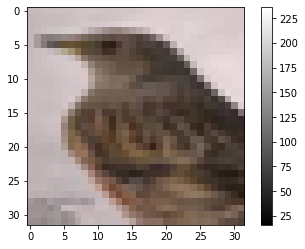

In [7]:
plt.figure()
plt.imshow(train_images[18], cmap='gray')
plt.colorbar()

In [8]:
#Escalamos los valores de pixeles entre 0 y 1
x_train = train_images/255. 
x_test = test_images/255. 

In [9]:
# Reorganizamos en forma de fila  los valores de las clases usando la funcion  flatten()
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

In [10]:
# Calcular numero de clases
K = len(set(train_labels))
print("numero de clases:", K)

numero de clases: 10


In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship,', 'truck']

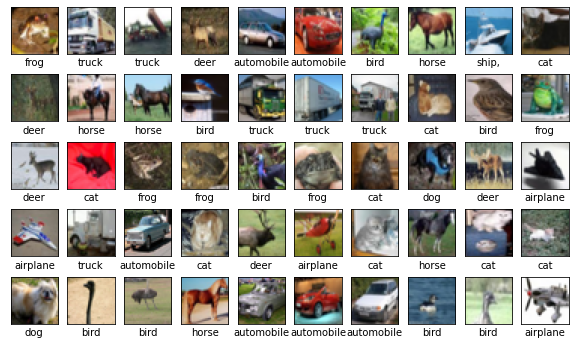

In [12]:
plt.figure(figsize=(10,6))
for i in range(50): # 50 el numero de imagenes
    plt.subplot(5,10,i+1) # 5 filas de  10columnas
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
from tensorflow.keras import layers

In [86]:
model = keras.models.Sequential()

model.add(layers.Flatten(input_shape=[32,32,3]))

model.add(layers.Dense(units=1024, kernel_initializer=keras.initializers.glorot_uniform, bias_initializer=keras.initializers.Zeros, activation='relu'))
model.add(layers.Dense(units=512, activation='relu'))
# model.add(layers.Dense(units=256, activation='relu'))
# model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))



In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer='adam',
              loss= keras.losses.sparse_categorical_crossentropy,
              metrics=['sparse_categorical_crossentropy'])

In [32]:
#model.compile(optimizer='adam',
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])

In [33]:
# model.evaluate(x_test, test_labels)

In [89]:
print('Training model...\n')

history = model.fit(x=x_train, 
                    y=train_labels, 
                    batch_size=20,
                    epochs=20, 
                    validation_split=0.2, 
                    shuffle=True)

print('Model trained successfully!')

Training model...

Epoch 1/20
2000/2000 [==============================] - 11s 6ms/step - loss: 1.8895 - sparse_categorical_crossentropy: 1.8895 - val_loss: 1.7837 - val_sparse_categorical_crossentropy: 1.7837
Epoch 2/20
1380/2000 [===================>..........] - ETA: 3s - loss: 1.7088 - sparse_categorical_crossentropy: 1.7088

In [80]:
df_history = pd.DataFrame(history.history)
df_history

,loss,sparse_categorical_crossentropy,val_loss,val_sparse_categorical_crossentropy
0,0.495601,0.495601,3.251420,3.251420
1,0.483324,0.483324,3.488101,3.488101
2,0.493274,0.493274,3.320596,3.320596
3,0.472453,0.472453,3.540947,3.540947
4,0.474387,0.474387,3.636051,3.636051
5,0.489196,0.489196,3.382145,3.382145
6,0.480795,0.480795,3.471102,3.471102
7,0.455185,0.455185,3.587036,3.587036
8,0.472959,0.472959,3.766966,3.766966
9,0.471378,0.471378,3.520496,3.520496


In [ ]:
def vis_res(historia, epocas):
  epochs = [i for i in range(epocas)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["sparse_categorical_crossentropy"]
  val_acc = history.history["val_sparse_categorical_crossentropy"]
  val_loss = history.history["val_loss"]
  train_loss = history.history["loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento SCC")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion SCC")
  ax[0].set_title("Entrenamiento & validación SCC")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("SCC")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

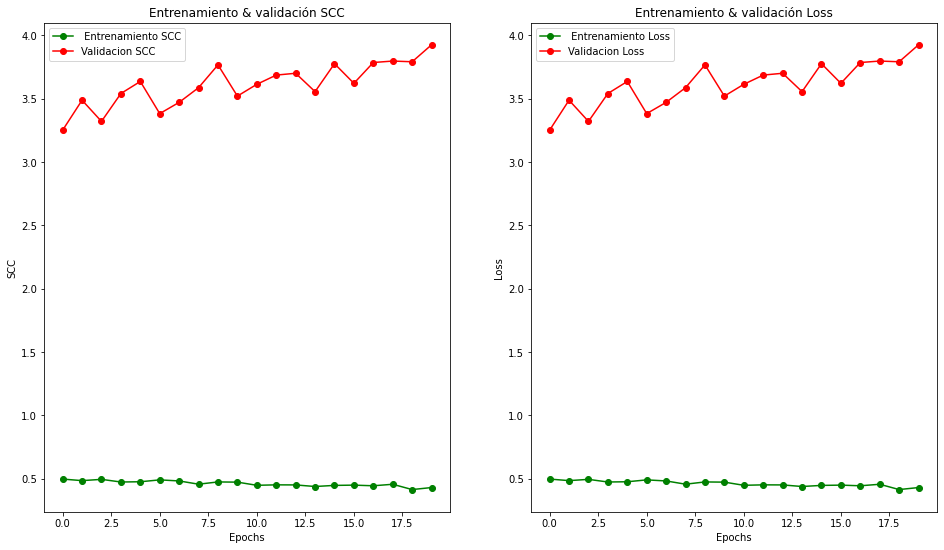

In [ ]:
vis_res(history,20)

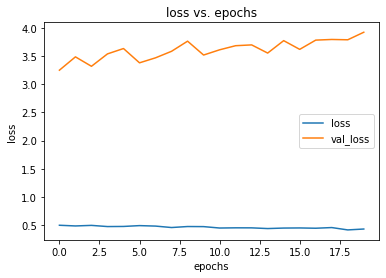

In [84]:
df_history.plot(y=['loss', 'val_loss'], title='loss vs. epochs', xlabel='epochs', ylabel='loss', legend=True)

In [85]:
df_history.plot(y=['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'],
                title='Train Accuracy vs. Val. Accuracy',
                xlabel='epochs',
                ylabel='Accuracy',
                legend=True
                )

KeyError: "None of [Index(['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'], dtype='object')] are in the [columns]"

In [51]:
loss, Accuracy = model.evaluate(x_test, test_labels)
print('loss=',round(loss*100,2),'%')
print('Accuracy=',round(Accuracy*100,2),'%')

313/313 [==============================] - 1s 4ms/step - loss: 1.5463 - sparse_categorical_accuracy: 0.4890
loss= 154.63 %
Accuracy= 48.9 %


### Hagamos predicciones

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
test_labels[0]

3

In [ ]:
#Funciones esto para poder ver todo el set de la prediccion de las 10 clases.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

A continaucion muestro la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

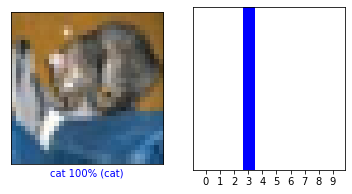

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

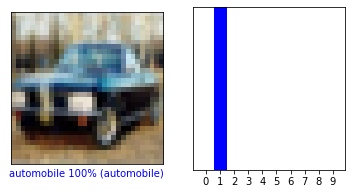

In [ ]:
i = 1500
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Multiples imagenes con sus predicciones

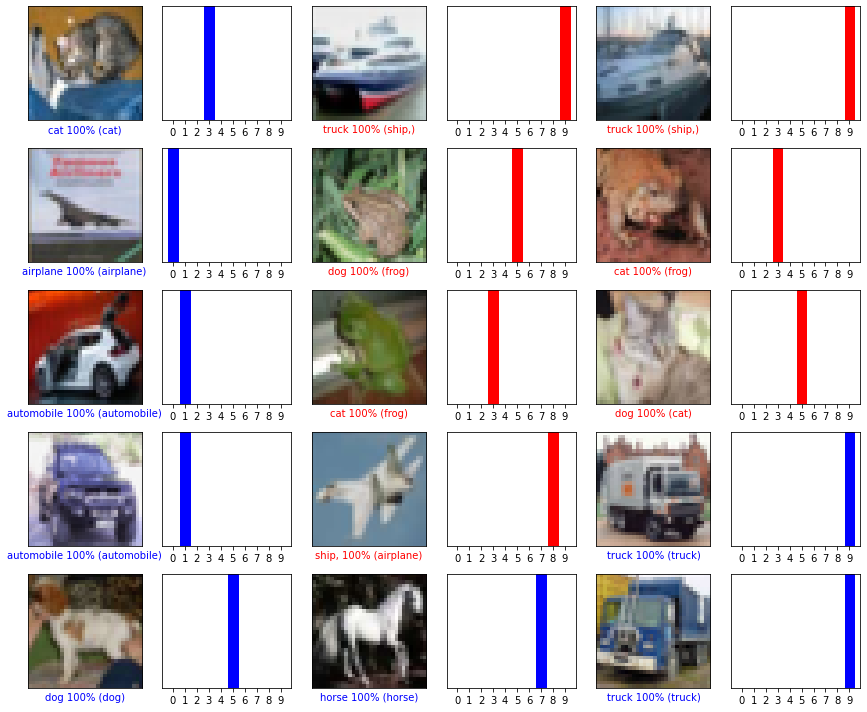

In [ ]:
# Visualizamos las primeras x imagenes, su etiqueta predicted y la etiqueta real.
# Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()